# Imports

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from IPython.display import display, Math
%matplotlib notebook
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
plt.ion()

# Newton Method

$$\Large\ \text{Main equation: } x_{n+1} = x_n - \frac{f'(x_n)}{f(x_n)}$$

In [49]:
class NewtonMethod:
    
    def __init__(self):
        pass
    
    def function(self, X):
        return np.cos(X) - X**3

    def gradient(self, X):
        return -np.sin(X) - 3*X**2
    
    def run(self):
        X = np.random.random()
        for i in range(10):
            X = X - self.function(X)/self.gradient(X)
            print("x_{} = {}".format(i, X))

In [50]:
newton_method = NewtonMethod()
newton_method.run()

x_0 = 15.120376544416478
x_1 = 10.083108900783266
x_2 = 6.712718689884602
x_3 = 4.48872259235389
x_4 = 2.964219508573314
x_5 = 1.945623153710971
x_6 = 1.316403636677434
x_7 = 0.9872803248484772
x_8 = 0.877837441996409
x_9 = 0.8656199904695028


# Gradient Descent

In [51]:
function = "(X-0.3)**2 + (Y+11)**2 + 3"
x = np.linspace(-100, 100, num = 100)
y = np.linspace(-100, 100, num = 100)
X, Y = np.meshgrid(x, y)
Z = eval(function)

<IPython.core.display.Javascript object>


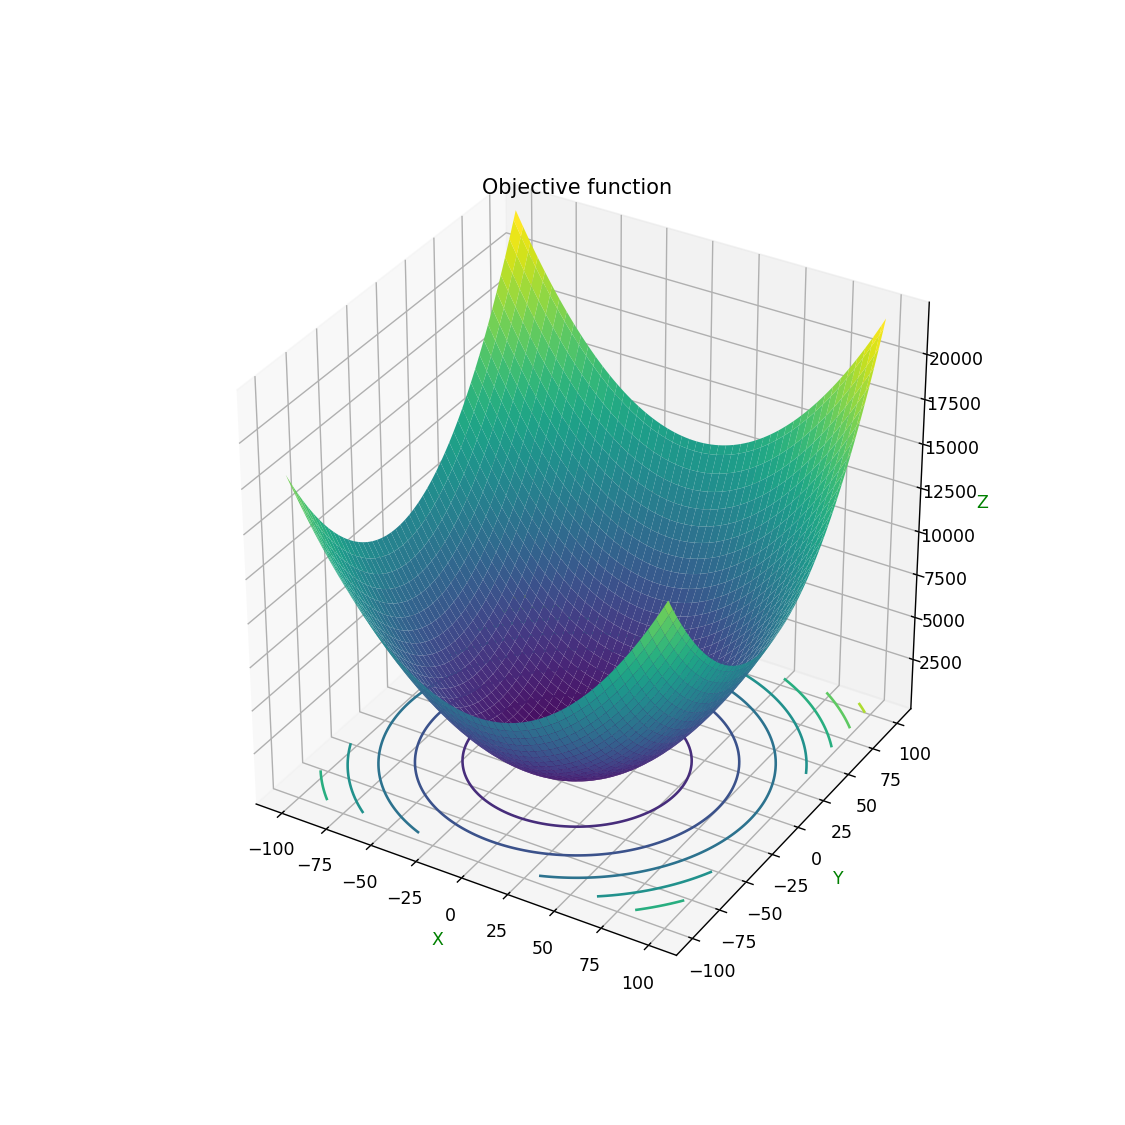

In [52]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Objective function")
ax.contour(X, Y, Z, zdir='z',offset = Z.min())
ax.set_xlabel('X', color = "green")
ax.set_ylabel('Y', color = "green")
ax.set_zlabel('Z', color = "green")
plt.show()

$$\Large\ \text{Main equation: } x_{n+1} = x_n - \gamma \nabla F(x)$$

In [53]:
class GradientDescent():
    
    def __init__(self,n_dim,learning_rate = 0.01,minimize = True, iterations = 1000):
        self.minimize = minimize
        self.learning_rate = learning_rate
        self.parameters = np.random.rand(n_dim) * 100
        self.iterations = iterations
    
    @staticmethod
    def compute_gradient(x:int,y:int)-> np.array:
        return np.array([2*(x-0.3), 2*(y+11)])
    
    def run(self) -> np.array:
        history = []
        for i in range(self.iterations):
            history.append(self.parameters.tolist() + [self.parameters[0]**2 + self.parameters[1]**2 + 3])
            gradient = self.compute_gradient(self.parameters[0], self.parameters[1])
            if self.minimize:
                self.parameters = self.parameters - self.learning_rate * gradient
            else:
                self.parameters = self.parameters + self.learning_rate * gradient
        return np.array(history)

In [56]:
gd = GradientDescent(n_dim = 2)
history = gd.run()

<IPython.core.display.Javascript object>


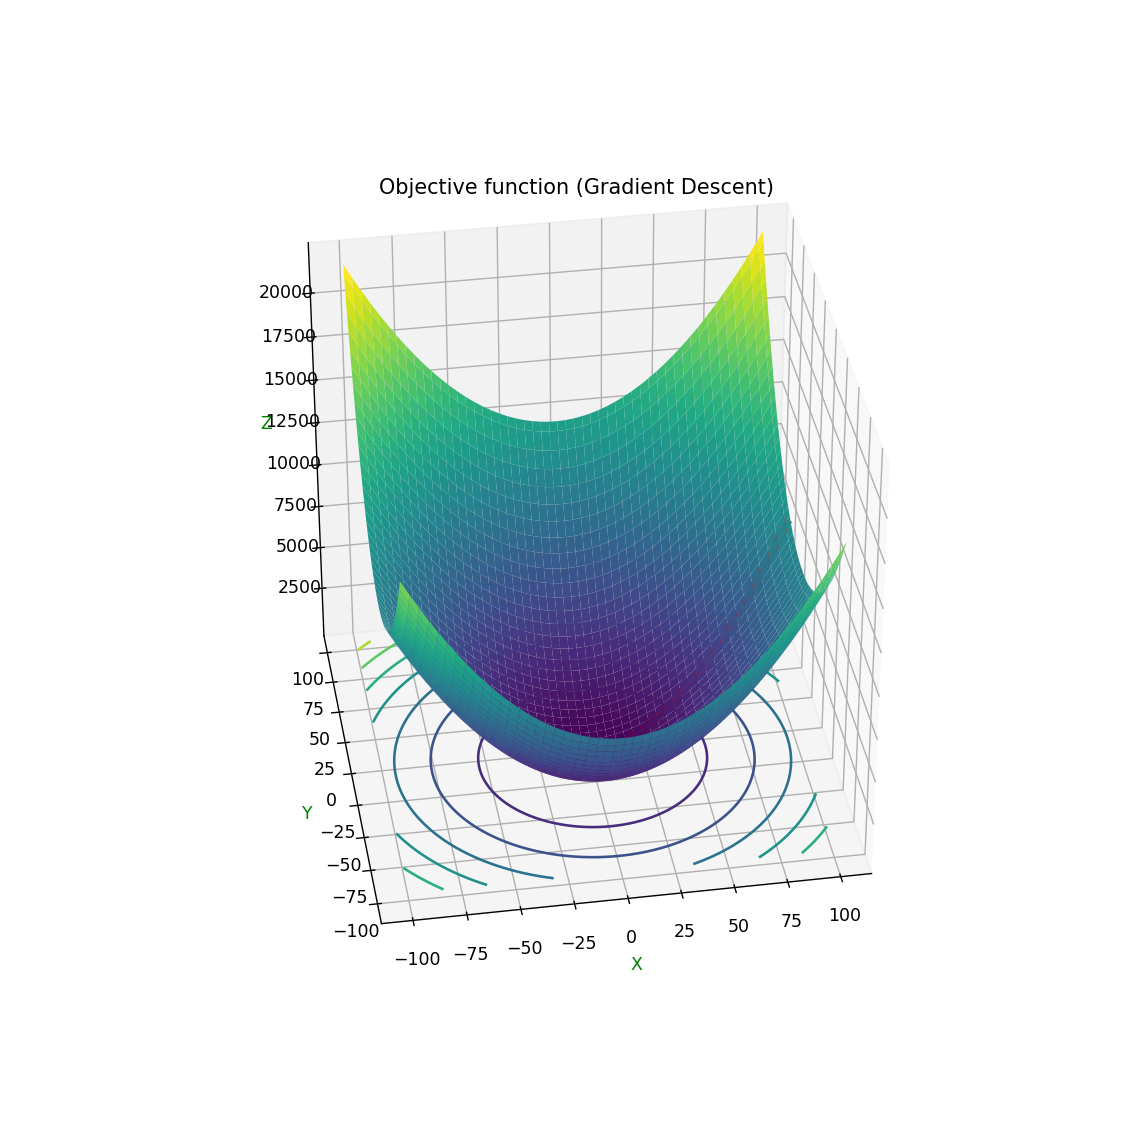

In [57]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Objective function (Gradient Descent)")
ax.contour(X, Y, Z, zdir='z',offset = Z.min())
ax.set_xlabel('X', color = "green")
ax.set_ylabel('Y', color = "green")
ax.set_zlabel('Z', color = "green")
ax.plot3D(history[:,0], history[:, 1], history[:, 2], "red", linewidth=5, linestyle="-", zorder = 1)
plt.show()

In [58]:
print("Minimum point of function:{}".format(history[-1, :2]))

Minimum point of function:[  0.3 -11. ]
